In [2]:
import pandas as pd
data=pd.read_csv("adult 3.csv ")
print(data)

       age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
4       18             ?  103497  Some-college               10   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation relationship   race  gender  \
0           Never-married  Machine-op-inspct    Own-child  Black    Male   
1      Married-civ-spouse    Farming-fishin

In [3]:
#PRE-PROCESSING
data.shape #number of rows n columns
data.isna() #says true if there are any null values
data.isna().sum() #sum of all null values under each column
print(data.occupation.value_counts()) #number of categories contributing to the dataset in each attribute value
#do for all attributes

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


In [4]:
#replace the '?' with any meaningful value/ category in the attribute 
data.occupation.replace({'?':'Others'},inplace=True)
print(data.occupation.value_counts()) #do for all columns with '?'

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Others               2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


C:\Users\DELL\AppData\Local\Temp\ipykernel_16164\3931726096.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.occupation.replace({'?':'Others'},inplace=True)


In [5]:
print(data["gender"].value_counts())

gender
Male      32650
Female    16192
Name: count, dtype: int64


In [6]:

data.workclass.replace({'?':'Others'},inplace=True)
print(data.workclass.value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


C:\Users\DELL\AppData\Local\Temp\ipykernel_16164\2954120477.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.workclass.replace({'?':'Others'},inplace=True)


In [7]:
#remove irrelevant data -> dimensionality reduction
data=data[data['workclass']!='Without-pay']
data=data[data['workclass']!='Never-worked']
print(data['workclass'].value_counts())
#do for all irrelevant columns

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Name: count, dtype: int64


In [8]:
print(data['age'].value_counts())
data = data[data['age'] <= 75]
print(data['age'].value_counts())


age
36    1348
35    1337
33    1335
23    1328
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: count, Length: 74, dtype: int64
age
36    1348
35    1337
33    1335
23    1328
31    1325
34    1303
37    1280
28    1280
30    1277
38    1264
32    1253
41    1235
27    1231
29    1222
24    1206
39    1205
25    1195
40    1187
22    1177
42    1165
26    1153
20    1111
43    1104
46    1096
45    1096
21    1095
47    1081
44    1067
19    1050
51     876
50     865
18     858
49     847
48     845
52     737
53     711
55     621
54     613
17     593
56     564
58     555
57     551
59     523
61     450
60     449
62     392
64     339
63     335
65     282
66     237
67     237
68     177
69     149
70     133
72     119
71     118
73     108
74      76
75      72
Name: count, dtype: int64


In [9]:
print(data['educational-num'].value_counts())
data = data[data['educational-num'] >=8]
print(data['educational-num'].value_counts())


educational-num
9     15655
10    10824
13     7983
14     2634
11     2053
7      1801
12     1592
6      1373
4       899
15      819
5       745
8       654
16      587
3       498
2       239
1        82
Name: count, dtype: int64
educational-num
9     15655
10    10824
13     7983
14     2634
11     2053
12     1592
15      819
8       654
16      587
Name: count, dtype: int64


In [10]:
#remove redundant information i.e eg: age and dob
#try to retain numerical value
data.drop(columns=['education'],inplace=True)

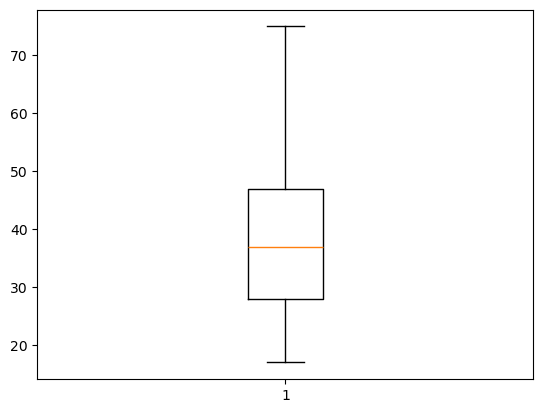

In [11]:
#outlier 
import matplotlib.pyplot as plt
plt.boxplot(data['age'])
plt.show()

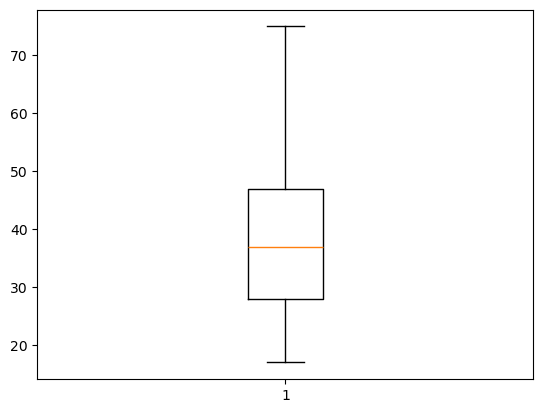

In [12]:
data=data[(data['age']>17) & (data['age'])<76]
plt.boxplot(data['age'])
plt.show() 
#do this for every column

In [13]:
X = data.drop('income', axis=1)  # Drop the income column (axis=1 means column)
y = data['income']               # Target variable


In [25]:
from sklearn.preprocessing import LabelEncoder
#to transform all categorical to numerical values
encoder = LabelEncoder()

# Identify all object (categorical) columns in X
categorical_cols = X.select_dtypes(include='object').columns

# Apply label encoding to each categorical column
for col in categorical_cols:
    X[col] = encoder.fit_transform(X[col])


In [26]:
print(X.head())

        age  workclass    fnlwgt  educational-num  marital-status  occupation  \
0  0.362069   0.500000  0.052451            0.125        0.333333    0.285714   
1  0.189655   0.166667  0.219649            0.500        0.333333    0.785714   
2  0.465517   0.500000  0.100153            0.250        0.333333    0.428571   
3  0.017241   0.333333  0.061708            0.250        0.666667    0.571429   
4  0.206897   0.333333  0.145280            0.125        0.666667    0.571429   

   relationship  race  gender  capital-gain  capital-loss  hours-per-week  \
0           0.0   1.0     1.0      0.000000           0.0        0.500000   
1           0.0   1.0     1.0      0.000000           0.0        0.397959   
2           0.0   0.5     1.0      0.076881           0.0        0.397959   
3           0.6   1.0     0.0      0.000000           0.0        0.295918   
4           0.8   0.5     1.0      0.000000           0.0        0.397959   

   native-country  
0         0.95122  
1         

In [27]:
#normalisation - to bring the values to a certain safe range
#min max technique is used now
from sklearn.preprocessing import MinMaxScaler 
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X) #range of (0,1)
X = pd.DataFrame(X_scaled, columns=data.drop('income', axis=1).columns)

In [28]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Drop the target column
X = data.drop('income', axis=1)
y = data['income']

# Identify all categorical columns
categorical_cols = X.select_dtypes(include='object').columns

# Apply LabelEncoder to each categorical column
encoder = LabelEncoder()
for col in categorical_cols:
    X[col] = encoder.fit_transform(X[col])

# Now all values in X are numeric, safe to scale
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# If you want the result as a DataFrame again with column names
X = pd.DataFrame(X_scaled, columns=data.drop('income', axis=1).columns)

# Preview
print(X.head())


        age  workclass    fnlwgt  educational-num  marital-status  occupation  \
0  0.362069   0.500000  0.052451            0.125        0.333333    0.285714   
1  0.189655   0.166667  0.219649            0.500        0.333333    0.785714   
2  0.465517   0.500000  0.100153            0.250        0.333333    0.428571   
3  0.017241   0.333333  0.061708            0.250        0.666667    0.571429   
4  0.206897   0.333333  0.145280            0.125        0.666667    0.571429   

   relationship  race  gender  capital-gain  capital-loss  hours-per-week  \
0           0.0   1.0     1.0      0.000000           0.0        0.500000   
1           0.0   1.0     1.0      0.000000           0.0        0.397959   
2           0.0   0.5     1.0      0.076881           0.0        0.397959   
3           0.6   1.0     0.0      0.000000           0.0        0.295918   
4           0.8   0.5     1.0      0.000000           0.0        0.397959   

   native-country  
0         0.95122  
1         

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=23, stratify=y )

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
predict=knn.predict(x_test)
predict

array(['<=50K', '>50K', '<=50K', ..., '<=50K', '>50K', '>50K'],
      dtype=object)

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predict)

0.8120546665109216

In [32]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
predict1=lr.predict(x_test)
predict1

array(['>50K', '>50K', '<=50K', ..., '<=50K', '<=50K', '>50K'],
      dtype=object)

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predict1)

0.8119378577269011

In [35]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam', hidden_layer_sizes=(5, 2), random_state=23, max_iter=2000)  # adam is optimizer
clf.fit(x_train,y_train)
predict2=clf.predict(x_test)
predict2

array(['>50K', '>50K', '<=50K', ..., '<=50K', '<=50K', '>50K'],
      dtype='<U5')

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predict2)

0.8361172760191566

In [37]:
# Imports
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dictionary of models
models = {
    "LogisticRegression": LogisticRegression(),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "GradientBoosting": GradientBoostingClassifier()
}

# Evaluate each model using pipeline
results = {}

for name, model in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    
    pipe.fit(x_train, y_train)
    y_pred = pipe.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))


LogisticRegression Accuracy: 0.8121
              precision    recall  f1-score   support

       <=50K       0.83      0.93      0.88      6320
        >50K       0.71      0.47      0.57      2241

    accuracy                           0.81      8561
   macro avg       0.77      0.70      0.72      8561
weighted avg       0.80      0.81      0.80      8561

RandomForest Accuracy: 0.8409
              precision    recall  f1-score   support

       <=50K       0.87      0.92      0.89      6320
        >50K       0.73      0.63      0.67      2241

    accuracy                           0.84      8561
   macro avg       0.80      0.77      0.78      8561
weighted avg       0.84      0.84      0.84      8561

KNN Accuracy: 0.8144
              precision    recall  f1-score   support

       <=50K       0.86      0.89      0.88      6320
        >50K       0.66      0.60      0.63      2241

    accuracy                           0.81      8561
   macro avg       0.76      0.75      0.

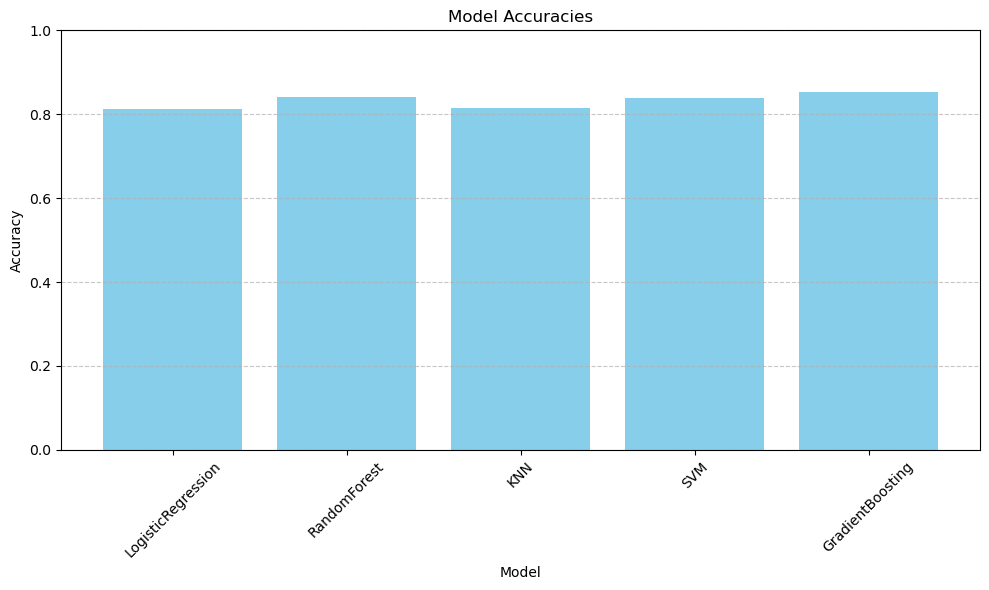

In [45]:
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.title('Model Accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


LogisticRegression Confusion Matrix


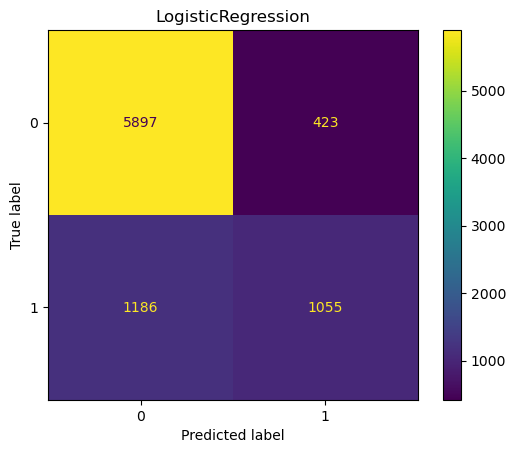


RandomForest Confusion Matrix


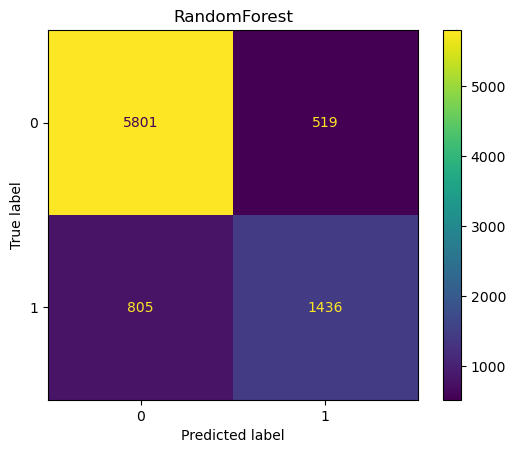


KNN Confusion Matrix


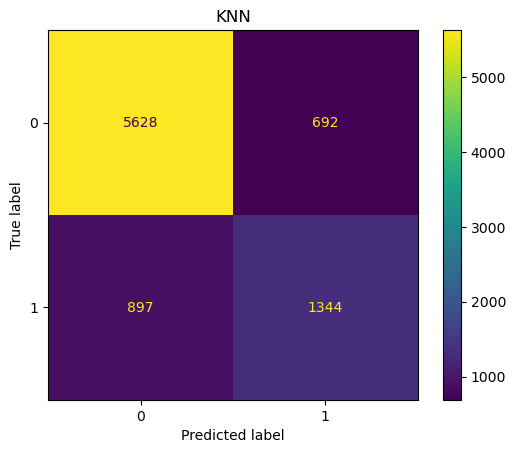


SVM Confusion Matrix


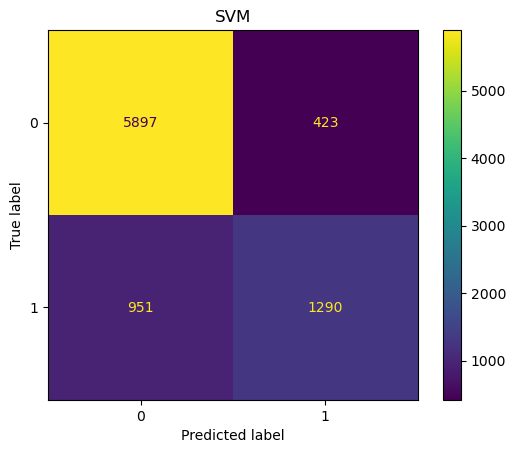


GradientBoosting Confusion Matrix


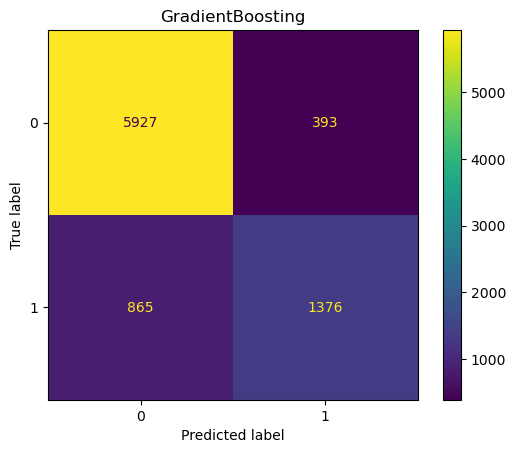

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

for name, model in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    pipe.fit(x_train, y_train)
    y_pred = pipe.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    print(f"\n{name} Confusion Matrix")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(name)
    plt.show()


Training LogisticRegression...
Training RandomForest...
Training KNN...
Training SVM...
Training GradientBoosting...


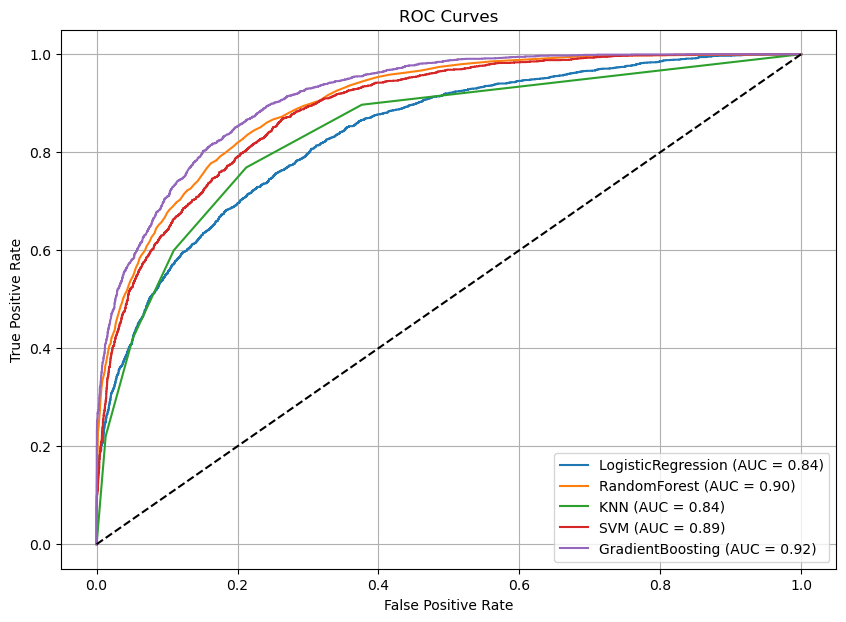

In [49]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# ✅ STEP 1: Train once and store models + their predictions
trained_models = {}
y_scores_dict = {}

for name, model in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    print(f"Training {name}...")
    pipe.fit(x_train, y_train)
    trained_models[name] = pipe
    
    if hasattr(pipe.named_steps['model'], "predict_proba"):
        y_scores = pipe.predict_proba(x_test)[:, 1]
    else:
        y_scores = pipe.decision_function(x_test)

    y_scores_dict[name] = y_scores  # Save for ROC later

# ✅ STEP 2: Plot ROC curves (no retraining now)
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)

plt.figure(figsize=(10, 7))

for name, y_scores in y_scores_dict.items():
    fpr, tpr, _ = roc_curve(y_test_encoded, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

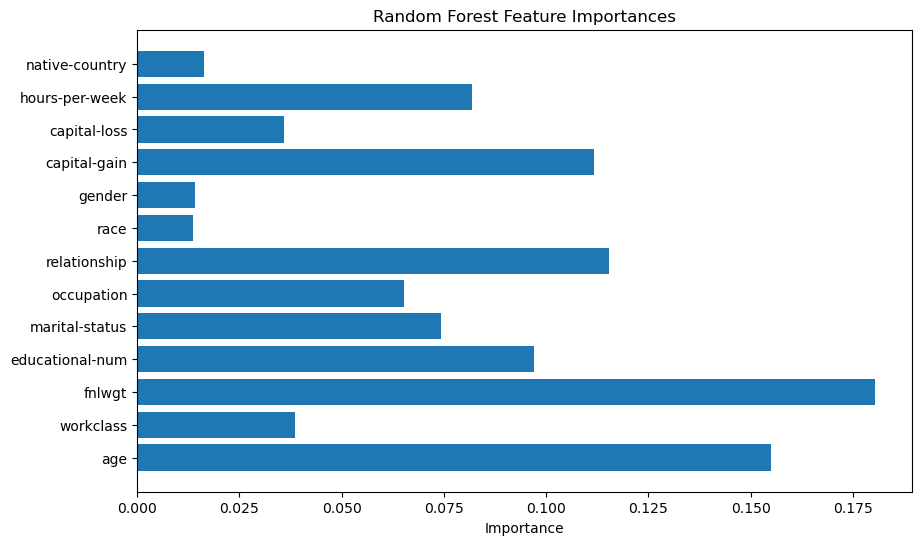

In [50]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
importances = rf_model.feature_importances_

plt.figure(figsize=(10, 6))
plt.barh(X.columns, importances)
plt.title("Random Forest Feature Importances")
plt.xlabel("Importance")
plt.show()


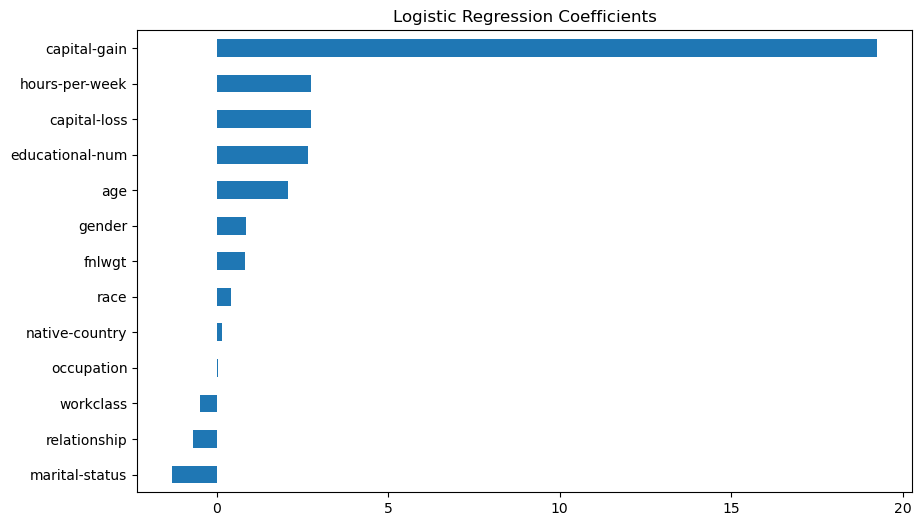

In [51]:
coefs = pd.Series(lr.coef_[0], index=X.columns)
coefs.sort_values().plot(kind='barh', figsize=(10,6), title="Logistic Regression Coefficients")
plt.show()


In [55]:
from sklearn.model_selection import cross_val_score

for name, model in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    scores = cross_val_score(pipe, X, y, cv=5)
    print(f"{name} CV Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})")


LogisticRegression CV Accuracy: 0.8090 (+/- 0.0025)
RandomForest CV Accuracy: 0.8444 (+/- 0.0038)
KNN CV Accuracy: 0.8155 (+/- 0.0035)
SVM CV Accuracy: 0.8369 (+/- 0.0025)
GradientBoosting CV Accuracy: 0.8543 (+/- 0.0017)


In [65]:
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC

# Scale once and split
X_scaled = StandardScaler().fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# Light models for quick timing
models = {
    "LogReg": LogisticRegression(max_iter=500),
    "RF": RandomForestClassifier(n_estimators=30, n_jobs=-1),
    "GB": GradientBoostingClassifier(n_estimators=30, max_depth=2),
    "LinearSVM": LinearSVC(max_iter=1000)
}

# Time each model
for name, model in models.items():
    start = time.time()
    model.fit(x_train, y_train)
    print(f"{name}: {time.time() - start:.2f}s")


LogReg: 0.15s
RF: 0.45s
GB: 1.23s
LinearSVM: 0.14s


In [67]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Use the already trained GradientBoosting model
best_model = GradientBoostingClassifier(n_estimators=30, max_depth=2)
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', best_model)
])

# Fit and predict
pipe.fit(x_train, y_train)
final_preds = pipe.predict(x_test)

# Save actual vs predicted to CSV
output = pd.DataFrame({'Actual': y_test, 'Predicted': final_preds})
output.to_csv('predictions.csv', index=False)

print("✅ Predictions saved to predictions.csv")


✅ Predictions saved to predictions.csv


In [68]:
import joblib  # or use pickle if you prefer

# Save the trained pipeline to a .pkl file
joblib.dump(pipe, 'income_prediction_model.pkl')

print("✅ Model saved as income_prediction_model.pkl")


✅ Model saved as income_prediction_model.pkl


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

# Load the trained model
model = joblib.load("best_model.pkl")

st.set_page_config(page_title="Employee Salary Classification", page_icon="💼", layout="centered")

st.title("💼 Employee Salary Classification App")
st.markdown("Predict whether an employee earns >50K or ≤50K based on input features.")

# Sidebar inputs (these must match your training feature columns)
st.sidebar.header("Input Employee Details")

# ✨ Replace these fields with your dataset's actual input columns
age = st.sidebar.slider("Age", 18, 65, 30)
education = st.sidebar.selectbox("Education Level", [
    "Bachelors", "Masters", "PhD", "HS-grad", "Assoc", "Some-college"
])
occupation = st.sidebar.selectbox("Job Role", [
    "Tech-support", "Craft-repair", "Other-service", "Sales",
    "Exec-managerial", "Prof-specialty", "Handlers-cleaners", "Machine-op-inspct",
    "Adm-clerical", "Farming-fishing", "Transport-moving", "Priv-house-serv",
    "Protective-serv", "Armed-Forces"
])
hours_per_week = st.sidebar.slider("Hours per week", 1, 80, 40)
experience = st.sidebar.slider("Years of Experience", 0, 40, 5)

# Build input DataFrame (⚠️ must match preprocessing of your training data)
input_df = pd.DataFrame({
    'age': [age],
    'education': [education],
    'occupation': [occupation],
    'hours-per-week': [hours_per_week],
    'experience': [experience]
})

st.write("### 🔎 Input Data")
st.write(input_df)
# Predict button
if st.button("Predict Salary Class"):
    prediction = model.predict(input_df)
    st.success(f"✅ Prediction: {prediction[0]}")

# Batch prediction
st.markdown("---")
st.markdown("#### 📂 Batch Prediction")
uploaded_file = st.file_uploader("Upload a CSV file for batch prediction", type="csv")

if uploaded_file is not None:
    batch_data = pd.read_csv(uploaded_file)
    st.write("Uploaded data preview:", batch_data.head())
    batch_preds = model.predict(batch_data)
    batch_data['PredictedClass'] = batch_preds
    st.write("✅ Predictions:")
    st.write(batch_data.head())
    csv = batch_data.to_csv(index=False).encode('utf-8')
    st.download_button("Download Predictions CSV", csv, file_name='predicted_classes.csv', mime='text/csv')



In [ ]:
!streamlit run app.py